In [153]:
import pandas as pd
import numpy as np

In [154]:
data_customer=pd.read_csv("/content/Customers.csv")

In [155]:
data_customer.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Eda

In [156]:
data_customer.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [157]:
data_customer.dropna(inplace=True)

In [158]:
# Check How many gender Male and Female
data_gender=data_customer["Gender"].value_counts()

In [159]:
data_gender

Female    1166
Male       799
Name: Gender, dtype: int64

Gender :
* Female total 1186
* Male total 814

### Search Profession by gender

In [160]:
data_worker=data_customer[["Gender","Work Experience","Profession"]]

In [161]:
import plotly.express as px

In [162]:
fig = px.bar(data_worker,y="Work Experience",x="Profession",
             color="Gender")
fig.show()

In [163]:
data_workder_by_gender=data_worker[["Gender","Profession"]].value_counts().reset_index()
data_workder_by_gender.rename(columns={"Gender": "Gender", "Proffesion": "Profession",0:"Total"},inplace=True)

In [164]:
data_workder_by_gender

,Gender,Profession,Total
0,Female,Artist,380
1,Male,Artist,232
2,Female,Healthcare,196
3,Male,Healthcare,143
4,Female,Entertainment,133
5,Female,Engineer,103
6,Male,Entertainment,101
7,Female,Doctor,89
8,Female,Executive,87
9,Female,Lawyer,86


* Artist most favorite profession in Male and Female
* Homemaker lower or not favorite in gender Female 

In [165]:
data_customer.describe(include='object')

,Gender,Profession
count,1965,1965
unique,2,9
top,Female,Artist
freq,1166,612


In [166]:
data_customer.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


## Data preprocessing

In [167]:
data_customer.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


### One hot encoding

In [168]:
data_preproc=pd.get_dummies(data_customer,
                            columns=["Profession"])

In [169]:
data_preproc.drop(columns=(["CustomerID"]),inplace=True)

In [170]:
data_preproc

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,Male,19,15000,39,1,4,0,0,0,0,0,1,0,0,0
1,Male,21,35000,81,3,3,0,0,1,0,0,0,0,0,0
2,Female,20,86000,6,1,1,0,0,1,0,0,0,0,0,0
3,Female,23,59000,77,0,2,0,0,0,0,0,0,0,1,0
4,Female,31,38000,40,2,6,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,71,184387,40,8,7,1,0,0,0,0,0,0,0,0
1996,Female,91,73158,32,7,7,0,1,0,0,0,0,0,0,0
1997,Male,87,90961,14,9,2,0,0,0,0,0,1,0,0,0
1998,Male,77,182109,4,7,2,0,0,0,0,1,0,0,0,0


##Validation evaluation 


### Validation evalutaion 
* use model Decision Tree
* for validation use RandomizedSearchCV

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

Before doing modelling 
* split data to data and target

In [173]:
data=data_preproc.drop(columns=(["Gender"]))
target=data_preproc["Gender"]

Split data to data use 
> train_test_split

In [174]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

Decision Tree have parameter because function code but in machine learning called hyperparameter

For paramemter use :
* **criterion** is math functiion for classification in decision tree and we use 2 function `gini` and `entropy`
* **max depth** is deep tree so experiment max depth 1 to 10 using `numpy` 

In [175]:
model_tree=DecisionTreeClassifier()
param_distribution={
    "criterion":["gini","entropy"],
    "max_depth":np.arange(start=1,
                          stop=10,
                          step=1)
}
validation_model_tree=RandomizedSearchCV(model_tree, 
                                         param_distributions=param_distribution, 
                                         n_iter=10,
                                         cv=2, 
                                         verbose=1,
                                         return_train_score=True
                                          )

In [176]:
validation_model_tree.fit(data_train, target_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   return_train_score=True, verbose=1)

In [177]:
validation_model_tree.get_params()

{'cv': 2,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'criterion': ['gini', 'entropy'],
  'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'refit': True,
 'return_train_score': True,
 'scoring': None,
 'verbose': 1}

In [178]:
accuracy = validation_model_tree.score(data_test, target_test)

print(f"The test accuracy score of the best model is "
      f"{accuracy:.2f}")

The test accuracy score of the best model is 0.62


In [179]:
from pprint import pprint
print("The best parameters are:")
pprint(validation_model_tree.best_params_)

The best parameters are:
{'criterion': 'gini', 'max_depth': 1}


In [180]:
validation_model_tree.best_params_.keys()

dict_keys(['max_depth', 'criterion'])

In [185]:
search_best_parameter_use_decision_tree=pd.DataFrame({
    "acc":[accuracy],
    "best_max_depth":validation_model_tree.best_params_.get("max_depth"),
    "best_criterion":validation_model_tree.best_params_.get("criterion"),

})

In [186]:
search_best_parameter_use_decision_tree

,acc,best_max_depth,best_criterion
0,0.621951,1,gini


## Modeliing

In [187]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=1)

In [192]:
tree.feature_names_in_

array(['Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Work Experience', 'Family Size', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'], dtype=object)

In [189]:
import matplotlib.pyplot as plt

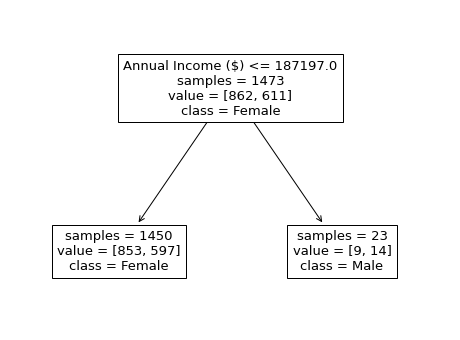

In [193]:
from sklearn.tree import plot_tree
_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=tree.feature_names_in_,
              class_names=tree.classes_, impurity=False, ax=ax)

In [197]:
data_test["predict"]=tree.predict(data_test)

In [198]:
data_test

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,predict
1962,70,124359,51,7,7,0,0,0,0,0,0,1,0,0,Female
1019,99,145777,94,1,5,0,0,0,0,1,0,0,0,0,Female
56,51,71000,50,9,4,0,0,0,0,0,1,0,0,0,Female
1380,21,123904,91,7,5,1,0,0,0,0,0,0,0,0,Female
1141,28,116644,88,6,3,1,0,0,0,0,0,0,0,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,38,130597,2,6,1,1,0,0,0,0,0,0,0,0,Female
713,62,92768,75,1,1,0,1,0,0,0,0,0,0,0,Female
1022,45,55472,51,1,3,0,0,0,0,0,1,0,0,0,Female
1365,50,117076,45,1,2,0,1,0,0,0,0,0,0,0,Female


## Evaluation